# Finding k

In this example we are analyzing the pricing data on one of the stocks in our portfolio. Specifically, we're examining the relationship between the day's trading volume and the spread between the high and low trading price. Use the elbow method to determine the optimal number of clusters, `k`, that should be used to segment these trades. Once the elbow curve has been established, we will evaluate the two most likely values for `k` using the K-means algorithm and a scatter plot.


In [1]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans

## Read in the `stock_data.csv` file from the Resources folder and create a DataFrame. Set the “date” column to create the DatetimeIndex. Be sure to include parameters for `parse_dates` and `infer_datetime_format`.

In [3]:
# Read in the CSV file as a Pandas DataFrame
stock_path = Path('../Resources/stock_data.csv')
spread_df = pd.read_csv(
    stock_path,
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)

# Review the DataFrame
spread_df.head()

,close,volume,open,high,low,returns,hi_low_spread
date,,,,,,,
2009-04-30,3.61,18193730,3.55,3.73,3.53,0.028490,0.20
2009-05-01,3.82,16233940,3.55,3.90,3.55,0.058172,0.35
2009-05-04,4.26,21236940,3.90,4.30,3.83,0.115183,0.47
2009-05-05,4.32,16369170,4.36,4.39,4.11,0.014085,0.28
2009-05-06,4.31,15075630,4.45,4.45,4.12,-0.002315,0.33


## Create two lists: one to hold the list of inertia scores and another for the range of k values (from 1 to 11) to analyze.

In [4]:
# Create a a list to store inertia values
inertia = []

# Create a list to store the values of k
k = list(range(1,11))

## Using a for-loop to evaluate each instance of k, define a K-means model, fit the K-means model based on the DataFrame, and append the model’s inertia to the empty inertia list that you created in Step 2.

In [5]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    kmeans = KMeans(n_clusters=i,random_state=1)
    kmeans.fit(spread_df)
    inertia.append(kmeans.inertia_)


## Store the values for k and the inertia in a Dictionary called `elbow_data`. Use `elbow_data` to create a Pandas DataFrame called `df_elbow`.

In [6]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {'k':k,'inertia':inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = elbow_data = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,2.835703e+18
1,2,9.903144e+17
2,3,4.999629e+17
3,4,3.062100e+17
4,5,2.101772e+17
5,6,1.540278e+17
6,7,1.101208e+17
7,8,8.440364e+16
8,9,6.657967e+16
9,10,5.220169e+16


## Using hvPlot, plot the `df_elbow` DataFrame to visualize the elbow curve.

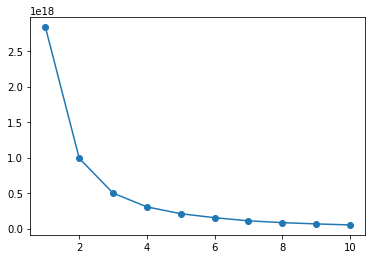

In [7]:
# Plot the DataFrame
plt.plot(k,inertia,marker='o')
plt.show()


## Perform the following tasks for each of the two most likely values of `k`:

  * Define a K-means model using `k` to define the clusters, fit the model, make predictions, and add the prediction values to the `spread_df` DataFrame.
  * Plot the clusters. The x-axis should reflect the "hi_low_spread", and the y-axis should reflect the "volume".

In [8]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(spread_df)

# Make predictions
k_lower = model.predict(spread_df)

# Add a class column with the labels
spread_df['clusters_lower'] = k_lower

In [9]:
spread_df.head()

,close,volume,open,high,low,returns,hi_low_spread,clusters_lower
date,,,,,,,,
2009-04-30,3.61,18193730,3.55,3.73,3.53,0.028490,0.20,1
2009-05-01,3.82,16233940,3.55,3.90,3.55,0.058172,0.35,1
2009-05-04,4.26,21236940,3.90,4.30,3.83,0.115183,0.47,1
2009-05-05,4.32,16369170,4.36,4.39,4.11,0.014085,0.28,1
2009-05-06,4.31,15075630,4.45,4.45,4.12,-0.002315,0.33,1


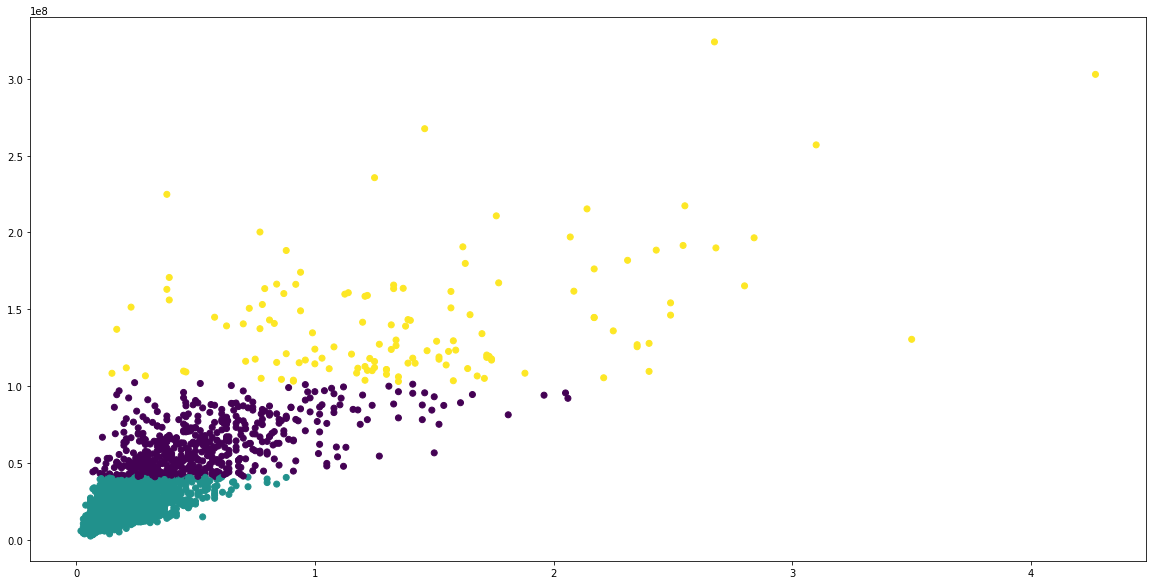

In [10]:
# Plot the clusters for the lower value of k
X = spread_df['hi_low_spread']
y = spread_df['volume']

plt.figure(figsize=(20,10))
plt.scatter(X,y,c=spread_df['clusters_lower'])
plt.show()

In [11]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(spread_df)

# Make predictions
k_higher = model.predict(spread_df)

# Add a class column with the labels
spread_df['clusters_higher'] = k_higher

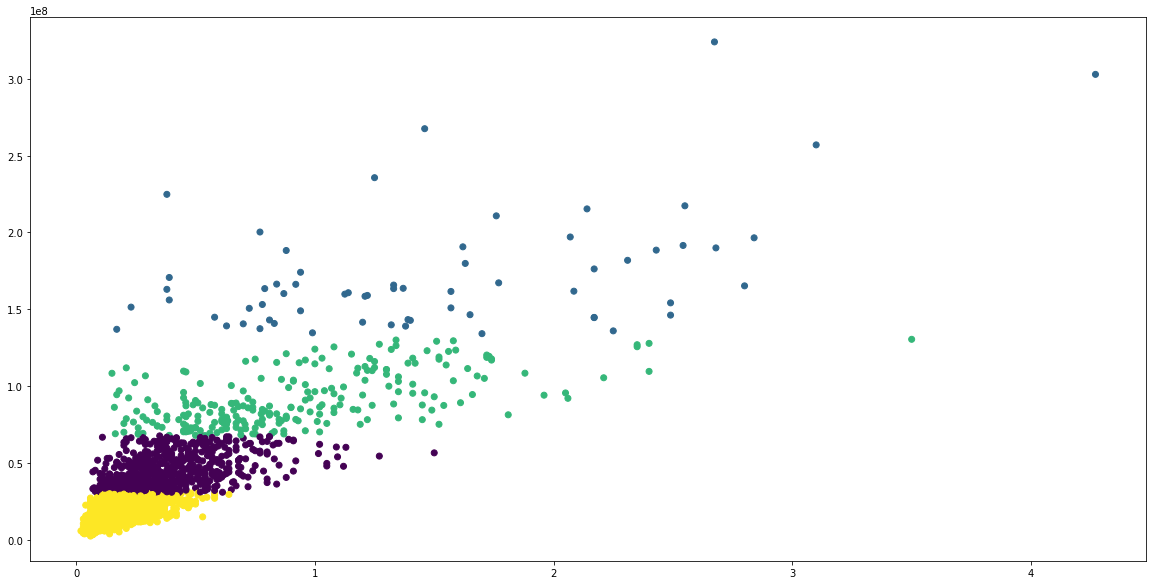

In [12]:
# Plot the clusters for the higher value of k
plt.figure(figsize=(20,10))
plt.scatter(X,y,c=spread_df['clusters_higher'])
plt.show()

## Answer the following question: Considering the plot, what’s the best number of clusters to choose, or value of k? 

# YOUR ANSWER HERE

Considering the plot, 3 clusters is the better number to choose for the value of k because it appears to better group the data points with high volumes and large spreads